## Nanose dataset

In [1]:
# exercise 3.1.1
import importlib_resources
import numpy as np
import xlrd

# Load xls sheet with data
filename = importlib_resources.files("dtuimldmtools").joinpath("data/nanonose.xls")
doc = xlrd.open_workbook(filename).sheet_by_index(0)

# Extract attribute names (1st row, column 4 to 12)
attributeNames = doc.row_values(0, 3, 11)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(0, 2, 92)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(5)))

# Extract vector y, convert to NumPy array
y = np.asarray([classDict[value] for value in classLabels])

# Preallocate memory, then extract excel data to matrix X
X = np.empty((90, 8))
for i, col_id in enumerate(range(3, 11)):
    X[:, i] = np.asarray(doc.col_values(col_id, 2, 92))

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)
N, M, C

(90, 8, 5)

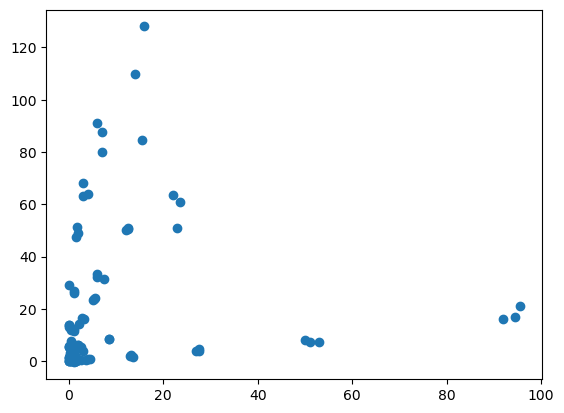

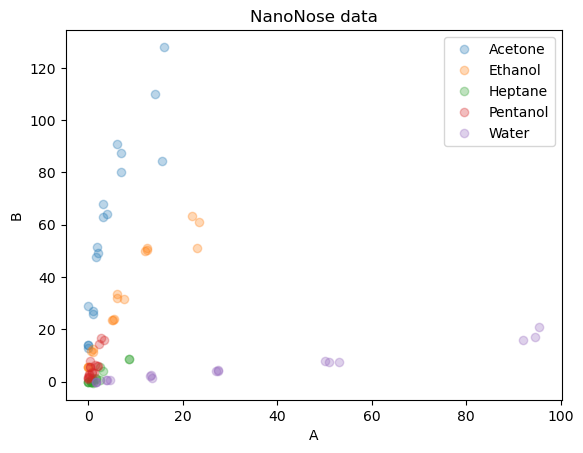

In [2]:
import matplotlib.pyplot as plt

# Data attributes to be plotted
i = 0
j = 1

##
# Make a simple plot of the i'th attribute against the j'th attribute
plt.plot(X[:, i], X[:, j], "o")

##
# Make another more fancy plot that includes legend, class labels,
# attribute names, and a title.
f = plt.figure()
plt.title("NanoNose data")

for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(X[class_mask, i], X[class_mask, j], "o", alpha=0.3)

plt.legend(classNames)
plt.xlabel(attributeNames[i])
plt.ylabel(attributeNames[j])

# Output result to screen
plt.show()

### PCA on nanose dataset

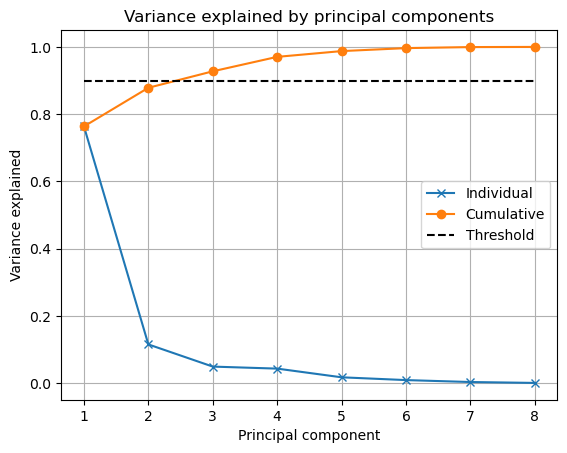

In [3]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
# Note: Here we use Y to in teh book we often use X with a hat-symbol on top.
Y = X - np.ones((N, 1)) * X.mean(axis=0)

# PCA by computing SVD of Y
# Note: Here we call the Sigma matrix in the SVD S for notational convinience
U, S, Vh = svd(Y, full_matrices=False)

# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Compute variance explained by principal components
# Note: This is an important equation, see Eq. 3.18 on page 40 in the book.
rho = (S * S) / (S * S).sum()

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


Can you verify that more than 90% of the variation in the data is explained by the
first 3 principal components? How many components would be needed for 95 %?

Yes, for 95% need 4

Y is (90, 8)


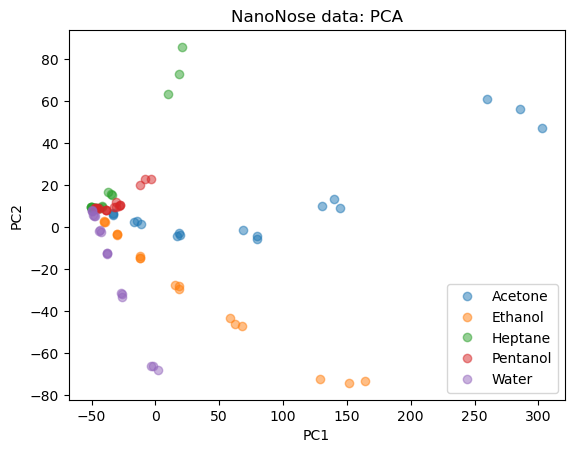

In [4]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N, 1)) * X.mean(0)
print(f"Y is {Y.shape}")

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)
# scipy.linalg.svd returns "Vh", which is the Hermitian (transpose)
# of the vector V. So, for us to obtain the correct V, we transpose:
V = Vh.T

# Project the centered data onto principal component space
# Note: Make absolutely sure you understand what the @ symbol
# does by inspecing the numpy documentation!
Z = np.dot(Y, V)

# Indices of the principal components to be plotted
i = 0
j = 1

# Plot PCA of the data
f = plt.figure()
plt.title("NanoNose data: PCA")
# Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))

# Output result to screen
plt.show()

In [11]:
Z[:, -1]

array([-0.00657858,  0.00988987, -0.00302224, ..., -0.00419159,
        0.0033422 ,  0.0003457 ])

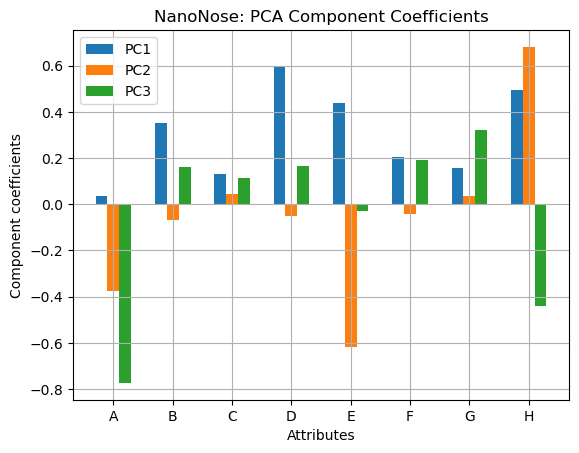

PC2:
[-0.37748501 -0.06817937  0.04400371 -0.0517022  -0.61774564 -0.04367017
  0.035871    0.680767  ]
First water observation
[ 86.03473333   0.67276574  -4.49826759 -11.48773404  36.42046959
   6.17674351 -10.45826424 -18.91989586]
...and its projection onto PC2
-68.15020514949514


In [5]:
import matplotlib.pyplot as plt
from scipy.linalg import svd

Y = X - np.ones((N, 1)) * X.mean(0)
U, S, Vh = svd(Y, full_matrices=False)
V = Vh.T
N, M = X.shape

# We saw in 2.1.3 that the first 3 components explaiend more than 90
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
bw = 0.2
r = np.arange(1, M + 1)

for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)

plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("NanoNose: PCA Component Coefficients")
plt.show()

# Inspecting the plot, we see that the 2nd principal component has large
# (in magnitude) coefficients for attributes A, E and H. We can confirm
# this by looking at it's numerical values directly, too:
print("PC2:")
print(V[:, 1].T)

# How does this translate to the actual data and its projections?
# Looking at the data for water:

# Projection of water class onto the 2nd principal component.
all_water_data = Y[y == 4, :]

print("First water observation")
print(all_water_data[0, :])

# Based on the coefficients and the attribute values for the observation
# displayed, would you expect the projection onto PC2 to be positive or
# negative - why? Consider *both* the magnitude and sign of *both* the
# coefficient and the attribute!

# You can determine the projection by (remove comments):
print("...and its projection onto PC2")
print(all_water_data[0, :] @ V[:, 1])

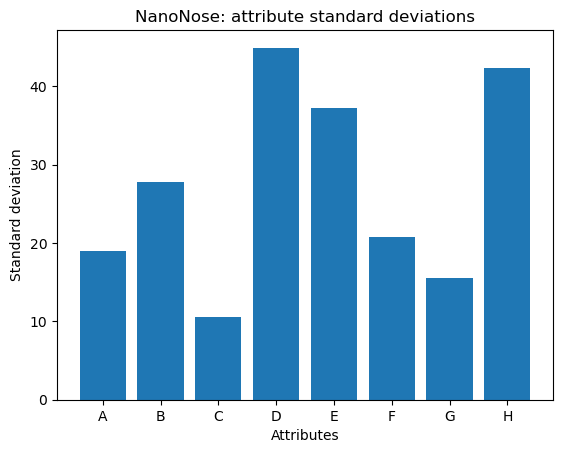

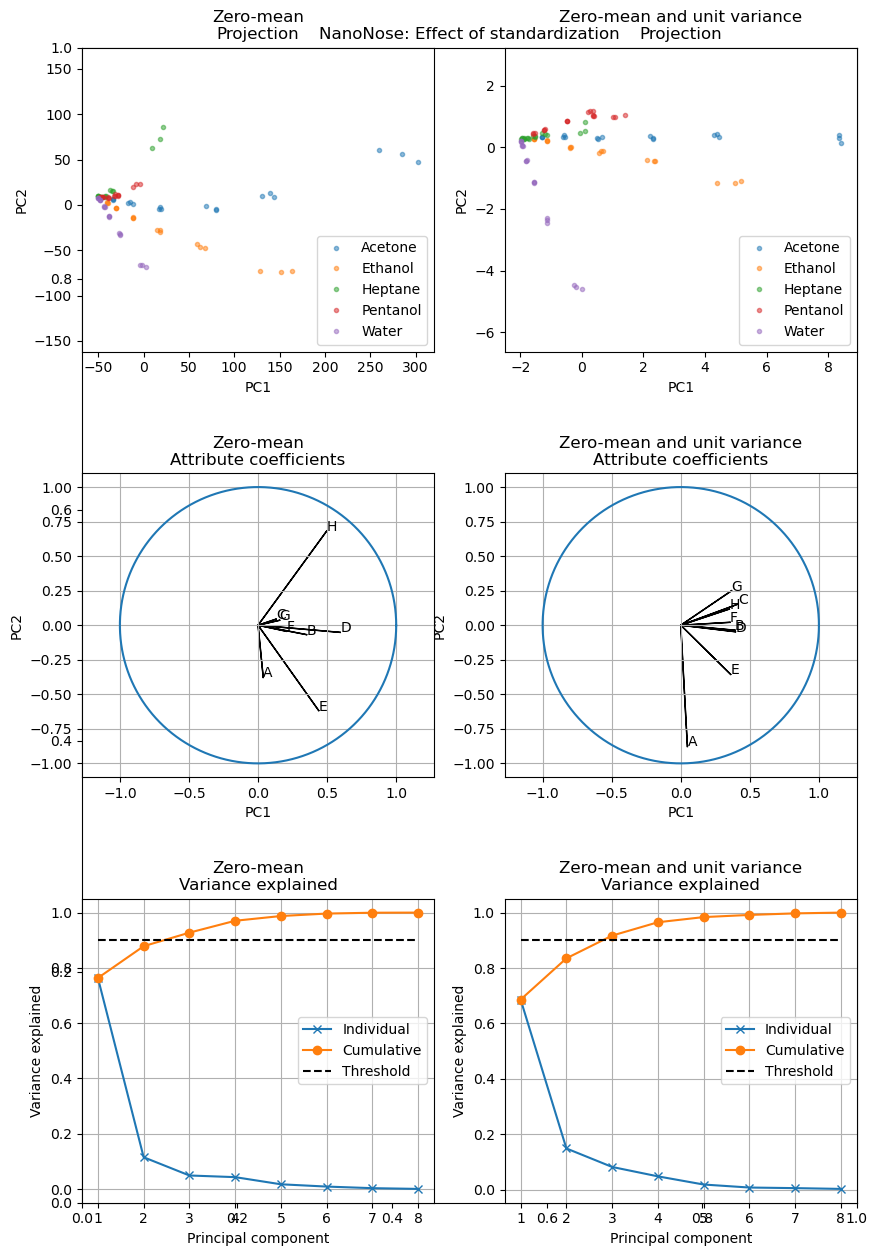

In [6]:
## exercise 3.1.6
import matplotlib.pyplot as plt
from scipy.linalg import svd

r = np.arange(1, X.shape[1] + 1)
plt.bar(r, np.std(X, 0))
plt.xticks(r, attributeNames)
plt.ylabel("Standard deviation")
plt.xlabel("Attributes")
plt.title("NanoNose: attribute standard deviations")

## Investigate how standardization affects PCA

# Try this *later*, and explain the effect
# X_s = X.copy() # Make a to be "scaled" version of X
# X_s[:, 2] = 100*X_s[:, 2] # Scale/multiply attribute C with a factor 100
# Use X_s instead of X to in the script below to see the difference.
# Does it affect the two columns in the plot equally?


# Subtract the mean from the data
Y1 = X - np.ones((N, 1)) * X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1)) * X.mean(0)
Y2 = Y2 * (1 / np.std(Y2, 0))
# Here were utilizing the broadcasting of a row vector to fit the dimensions
# of Y2

# Store the two in a cell, so we can just loop over them:
Ys = [Y1, Y2]
titles = ["Zero-mean", "Zero-mean and unit variance"]
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10, 15))
plt.subplots_adjust(hspace=0.4)
plt.title("NanoNose: Effect of standardization")
nrows = 3
ncols = 2
for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U, S, Vh = svd(Ys[k], full_matrices=False)
    V = Vh.T  # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k == 1:
        V = -V
        U = -U

    # Compute variance explained
    rho = (S * S) / (S * S).sum()

    # Compute the projection onto the principal components
    Z = U * S

    # Plot projection
    plt.subplot(nrows, ncols, 1 + k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y == c, i], Z[y == c, j], ".", alpha=0.5)
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.title(titles[k] + "\n" + "Projection")
    plt.legend(classNames)
    plt.axis("equal")

    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols, 3 + k)
    for att in range(V.shape[1]):
        plt.arrow(0, 0, V[att, i], V[att, j])
        plt.text(V[att, i], V[att, j], attributeNames[att])
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.xlabel("PC" + str(i + 1))
    plt.ylabel("PC" + str(j + 1))
    plt.grid()
    # Add a unit circle
    plt.plot(
        np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01))
    )
    plt.title(titles[k] + "\n" + "Attribute coefficients")
    plt.axis("equal")

    # Plot cumulative variance explained
    plt.subplot(nrows, ncols, 5 + k)
    plt.plot(range(1, len(rho) + 1), rho, "x-")
    plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
    plt.plot([1, len(rho)], [threshold, threshold], "k--")
    plt.title("Variance explained by principal components")
    plt.xlabel("Principal component")
    plt.ylabel("Variance explained")
    plt.legend(["Individual", "Cumulative", "Threshold"])
    plt.grid()
    plt.title(titles[k] + "\n" + "Variance explained")

plt.show()

Before standardization: The attribute with the highest standard deviation will dominate the PCA results because PCA is sensitive to the scale of the data. This attribute will likely have a large magnitude in the attribute coefficients (loadings) of the principal components.

After standardization: All attributes will have the same scale (mean = 0, standard deviation = 1). The attribute with the highest standard deviation will no longer dominate, and its contribution to the principal components will be more balanced with the other attributes.

Changes in direction and magnitude:

The direction of the attribute coefficients may change because the relative importance of the attributes is reweighted.

The magnitude of the coefficients for the previously dominant attribute will decrease after standardization.

Before standardization: The principal components will likely explain a large proportion of the variance in the dominant attribute, but this may not reflect the true structure of the data.

After standardization: The variance explained by the principal components will be more evenly distributed across all attributes, providing a more balanced representation of the data.

If you multiply one attribute by 100, it will artificially increase its variance, making it dominate the PCA results.

Effect on PCA:

The principal components will align heavily with the scaled attribute.

The variance explained by the first principal component will increase significantly, as it will capture most of the variance introduced by the scaled attribute.

The attribute coefficients for the scaled attribute will have a much larger magnitude compared to the others.

## Handwritten digits

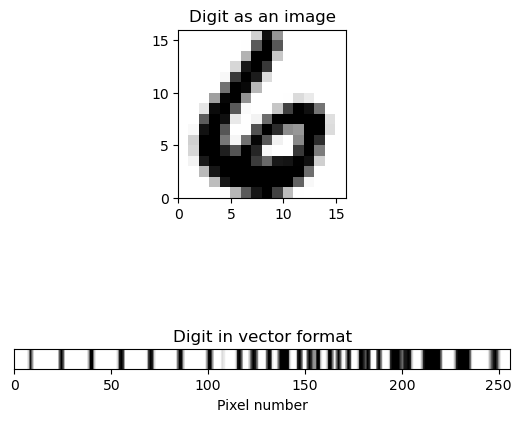

In [7]:
import importlib_resources
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/zipdata.mat")
# Index of the digit to display
i = 0

# Load Matlab data file to python dict structure
mat_data = loadmat(filename)

# Extract variables of interest
testdata = mat_data["testdata"]
traindata = mat_data["traindata"]
X = traindata[:, 1:]
y = traindata[:, 0]


# Visualize the i'th digit as a vector
f = plt.figure()
plt.subplot(4, 1, 4)
plt.imshow(np.expand_dims(X[i, :], axis=0), extent=(0, 256, 0, 10), cmap=plt.cm.gray_r)
plt.xlabel("Pixel number")
plt.title("Digit in vector format")
plt.yticks([])

# Visualize the i'th digit as an image
plt.subplot(2, 1, 1)
I = np.reshape(X[i, :], (16, 16))
plt.imshow(I, extent=(0, 16, 0, 16), cmap=plt.cm.gray_r)
plt.title("Digit as an image")

plt.show()

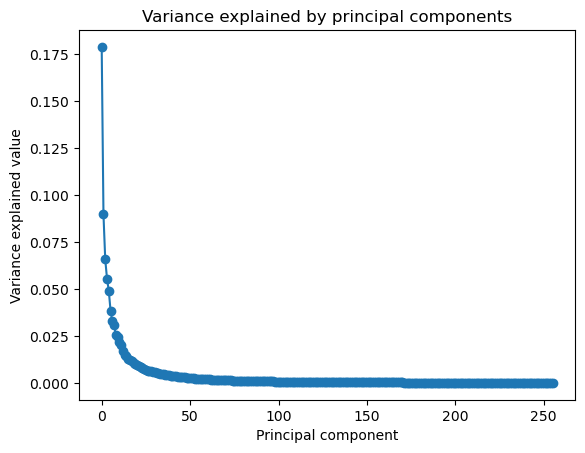

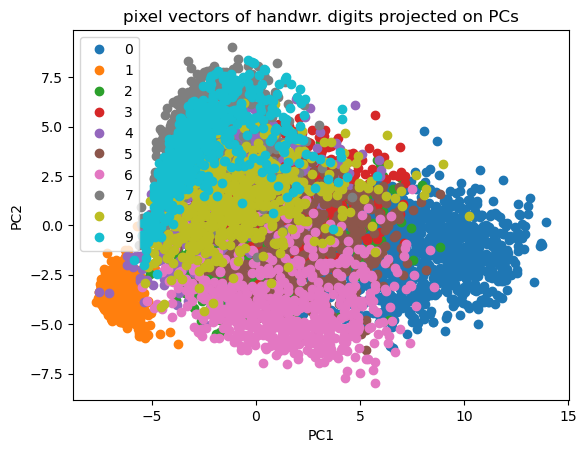

In [8]:
import importlib_resources
import numpy as np
from scipy.linalg import svd
import matplotlib.pyplot as plt
from scipy.io import loadmat

filename = importlib_resources.files("dtuimldmtools").joinpath("data/zipdata.mat")

# Digits to include in analysis (to include all, n = range(10) )
n = range(10)
# Number of principal components for reconstruction
K = 16
# Digits to visualize
nD = range(6)

# Load Matlab data file to python dict structure
# and extract variables of interest
traindata = loadmat(filename)["traindata"]
X = traindata[:, 1:]
y = traindata[:, 0]

N, M = X.shape
C = len(n)

classValues = n
classNames = [str(num) for num in n]
classDict = dict(zip(classNames, classValues))


# Select subset of digits classes to be inspected
class_mask = np.zeros(N).astype(bool)
for v in n:
    cmsk = y == v
    # Use the logical OR operator ("|") to select rows
    # already in class_mask OR cmsk
    class_mask = class_mask | cmsk
X = X[class_mask, :]
y = y[class_mask]
N = X.shape[0]

# Center the data (subtract mean column values)
Y = X - np.ones((N, 1)) * X.mean(0)

# PCA by computing SVD of Y
U, S, Vh = svd(Y, full_matrices=False)  # NOTE: Change to Vh
# U = mat(U)
V = Vh.T

# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()

# Project data onto principal component space
Z = Y @ V

# Plot variance explained
plt.figure()
plt.plot(rho, "o-")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained value")


# Plot PCA of the data
f = plt.figure()
plt.title("pixel vectors of handwr. digits projected on PCs")
for c in n:
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, 0], Z[class_mask, 1], "o")
plt.legend(classNames)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()




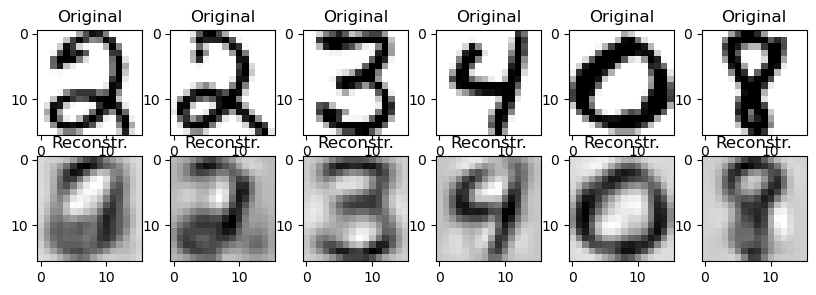

In [9]:
# Visualize the reconstructed data from the first K principal components
# Select randomly D digits.
K =16
plt.figure(figsize=(10, 3))
W = Z[:, range(K)] @ V[:, range(K)].T
D = len(nD)
for d in range(D):
    # Select random digit index
    digit_ix = np.random.randint(0, N)
    plt.subplot(2, D, int(d + 1))
    # Reshape the digit from vector to 16x16 array
    I = np.reshape(X[digit_ix, :], (16, 16))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.title("Original")
    plt.subplot(2, D, D + d + 1)
    # Reshape the digit from vector to 16x16 array
    I = np.reshape(W[digit_ix, :] + X.mean(0), (16, 16))
    plt.imshow(I, cmap=plt.cm.gray_r)
    plt.title("Reconstr.")
plt.show()

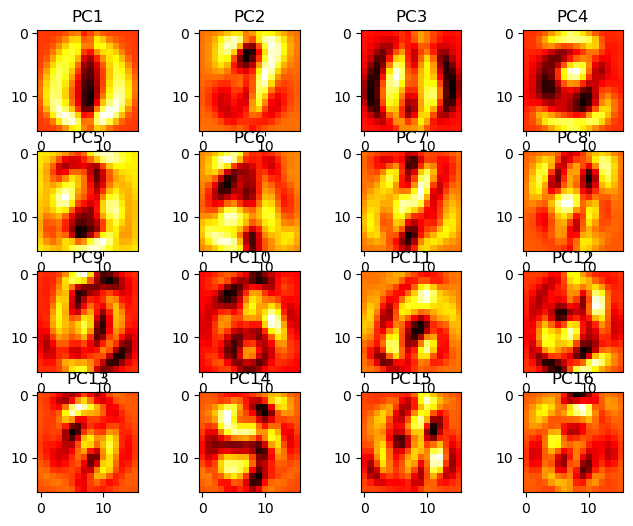

In [10]:
# Visualize the pricipal components
plt.figure(figsize=(8, 6))
for k in range(K):
    N1 = int(np.ceil(np.sqrt(K)))
    N2 = int(np.ceil(K / N1))
    plt.subplot(N2, N1, int(k + 1))
    I = np.reshape(V[:, k], (16, 16))
    plt.imshow(I, cmap=plt.cm.hot)
    plt.title("PC{0}".format(k + 1))

# output to screen
plt.show()

When all digit types (e.g., 0-9) are analyzed together:

The dataset contains a wide variety of shapes and patterns, corresponding to different digits.

The principal components will capture the global structure of the data, focusing on the most significant variations across all digits.

The first few principal components will likely represent features that distinguish between different digits (e.g., the presence of loops, straight lines, etc.).

The variance explained by the principal components will be distributed across the differences between digit types.

When only a single digit type (e.g., only the digit "3") is analyzed:

The dataset contains only variations of a single digit, so the principal components will capture the intra-class variability (variations within the same digit).

The first few principal components will represent the most significant ways in which the digit "3" can vary (e.g., slant, curvature, thickness, etc.).

The variance explained by the principal components will focus on the subtle differences within the digit, rather than distinguishing between different digits.

Global vs. Local Structure:

When analyzing all digits together, PCA captures the global structure of the dataset, emphasizing differences between digit types.

When analyzing a single digit, PCA captures the local structure, emphasizing variations within the digit.

Variance Explained:

For all digits, the variance explained by the principal components will reflect the differences between digit types.

For a single digit, the variance explained will reflect the variations within the digit (e.g., handwriting style, noise, etc.).

Principal Components:

For all digits, the principal components will represent features that distinguish between digits (e.g., loops for "8", straight lines for "1").

For a single digit, the principal components will represent features that describe variations of the digit (e.g., slant, curvature, etc.).

Suppose you analyze the digit "3":

The first principal component might capture the overall slant of the digit.

The second principal component might capture the curvature of the loops.

The variance explained will reflect how much of the variability in the digit "3" is due to slant, curvature, etc.

If you analyze all digits together:

The first principal component might capture the presence of loops (e.g., distinguishing "8" from "1").

The second principal component might capture the presence of straight lines (e.g., distinguishing "1" from "0").

The variance explained will reflect the differences between digit types.